In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
df=pd.read_csv("/content/drive/MyDrive/house-prices.csv")
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [3]:
x=df["SqFt"]
x

,SqFt
0,1790
1,2030
2,1740
3,1980
4,2130
...,...
123,1900
124,2160
125,2070
126,2020


In [4]:
y=df["Price"]
y

,Price
0,114300
1,114200
2,114800
3,94700
4,119800
...,...
123,119700
124,147900
125,113500
126,149900


<Axes: xlabel='SqFt', ylabel='Price'>

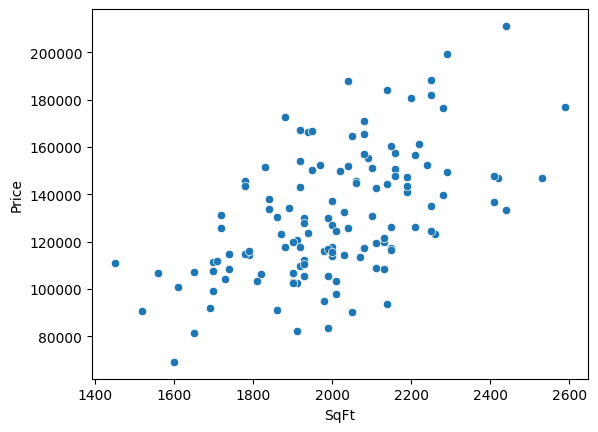

In [5]:
sns.scatterplot(x=x,y=y)

In [6]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [7]:
# reg.fit(x,y) ERROR
# to fit x it has to be a 2D  array
reg.fit(df[["SqFt"]],y)

LinearRegression()

In [8]:
reg1=LinearRegression()
reg1.fit(x.values.reshape(-1,1),y) # reshape(-1,1) 1D --> 2D

LinearRegression()

In [9]:
reg.predict([[200000]])

array([14035172.51866792])

In [10]:
reg.coef_

array([70.22631824])

In [11]:
reg.intercept_

-10091.129909123149

In [12]:
reg1.coef_

array([70.22631824])

In [13]:
reg1.intercept_

-10091.129909123149

In [14]:
reg1.predict([[200000]])

array([14035172.51866792])

In [15]:
accuracy=reg.score(df[["SqFt"]],y)
accuracy

0.3057893605816919

In [16]:
from sklearn.metrics import r2_score
y_original=y
y_predicted=reg.predict(df[["SqFt"]])
r2_score(y_original,y_predicted)

0.3057893605816919

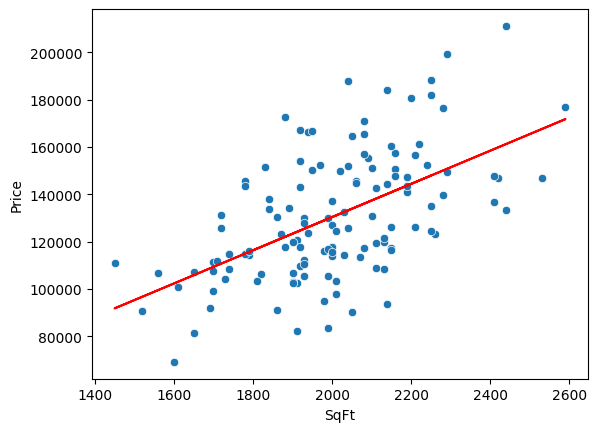

In [17]:
sns.scatterplot(x=x,y=y)
plt.plot(df["SqFt"],reg.predict(df[["SqFt"]]),color="red")

optimization

<Axes: xlabel='SqFt'>

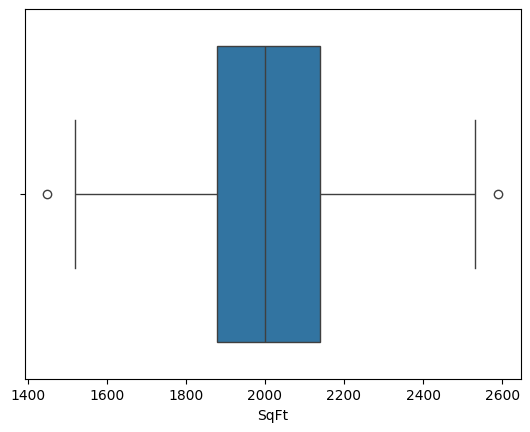

In [18]:
sns.boxplot(x=df["SqFt"])

<Axes: xlabel='Price'>

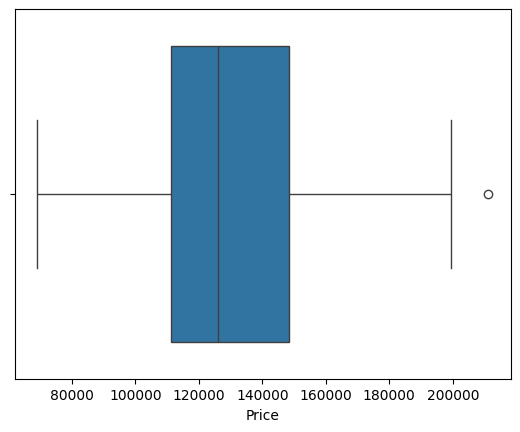

In [19]:
sns.boxplot(x=df["Price"])

In [20]:
x.isnull().sum()

0

In [21]:
y.isnull().sum()

0

In [22]:
x.sort_values()
print(x.head())
print(x.tail())

0    1790
1    2030
2    1740
3    1980
4    2130
Name: SqFt, dtype: int64
123    1900
124    2160
125    2070
126    2020
127    2250
Name: SqFt, dtype: int64


In [23]:
y.sort_values()
print(y.head())
print(y.tail())

0    114300
1    114200
2    114800
3     94700
4    119800
Name: Price, dtype: int64
123    119700
124    147900
125    113500
126    149900
127    124600
Name: Price, dtype: int64


In [24]:
q1=x.quantile(0.25)
q3=x.quantile(0.75)
iqr=q3-q1

In [25]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr

In [26]:
upper_outliers=x[x>ul]
lower_outliers=x[x<ll]

In [27]:
upper_outliers

,SqFt
14,2590


In [28]:
lower_outliers

,SqFt
65,1450


In [29]:
true=x[(x<ul) & (x>ll)]
false=x[(x>ul) | (x<ll)]

In [30]:
false.mean()

2020.0

In [31]:
true.mean()

1996.4

In [32]:
true.median()

2000.0

In [33]:
false.median()

2020.0

In [34]:
x.false=x.fillna(true.median(),inplace=True)

<Axes: xlabel='SqFt'>

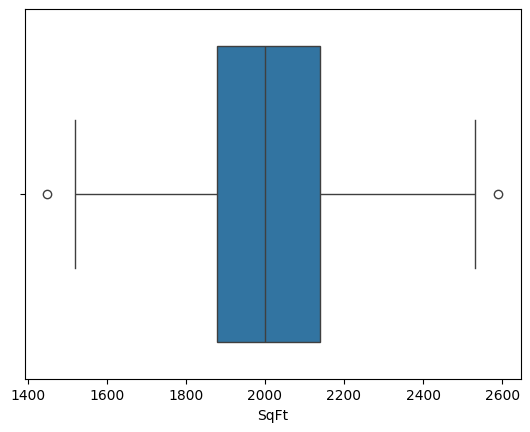

In [35]:
sns.boxplot(x=x)